In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import time

In [2]:
SCAN_INTERVAL = dt.timedelta(seconds = 0.01)

In [3]:
def sine_calc(a, t, t0, w):
    return (a * np.sin(2*np.pi*(t - t0)/w))

In [4]:
class sine_class():
    def __init__(self, amplitude, period, sigma):
        self._start_time = dt.datetime.now()
        self._amplitude = amplitude
        self._period = period.total_seconds()*1e6   # timedelta
        self._sigma = sigma
        self._state = None
    
    def time_delta(self):
        dt1 = self._start_time
        dt2 = dt.datetime.now()
        delta_milliseconds = (dt2 - dt1).total_seconds()*1e6 
        return delta_milliseconds
    
    def sine_calc(self):
        a = self._amplitude
        delta_t = self.time_delta()
        w = self._period
        s = self._sigma
        return (a * np.sin(2*np.pi*(delta_t)/w))# + np.random.normal(0, s)
    
    def update(self):
        self._state = self.sine_calc()

In [9]:
%%time
amplitude = 1
period = dt.timedelta(seconds=1)
sigma = 0.0001
times = []
readings = []
sine_obj = sine_class(amplitude, period, sigma)

for i in range(100):
    times.append(dt.datetime.now())
    sine_obj.update()
    readings.append(sine_obj._state)
    time.sleep((1/1.15)*SCAN_INTERVAL.total_seconds())  # Takes slightly longer than a second to run so normalise

CPU times: user 10.9 ms, sys: 3.91 ms, total: 14.8 ms
Wall time: 1.01 s


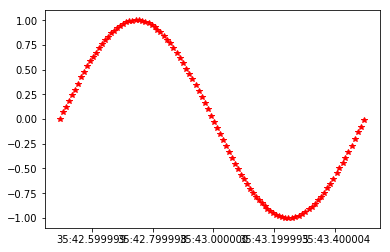

In [10]:
plt.plot(times, readings, 'r*');